In [104]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [105]:
# load the datasets
train_data=pd.read_excel("C:/Users/Arcturus/Downloads/Data_Train.xlsx")
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [106]:
test_datas=pd.read_excel("C:/Users/Arcturus/Downloads/Data_Test.xlsx")
test_datas

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [107]:
# In both data set drop the RESTAURANT_ID
train_data.drop(["RESTAURANT_ID"],axis=1,inplace=True)

In [108]:
test_datas.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [109]:
test_datas

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [110]:
train_data

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [111]:
# check the datatypes
train_data.dtypes

TITLE       object
CUISINES    object
TIME        object
CITY        object
LOCALITY    object
RATING      object
VOTES       object
COST         int64
dtype: object

In [112]:
# Check the null values
train_data.isnull().sum()

TITLE       1003
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

<Axes: >

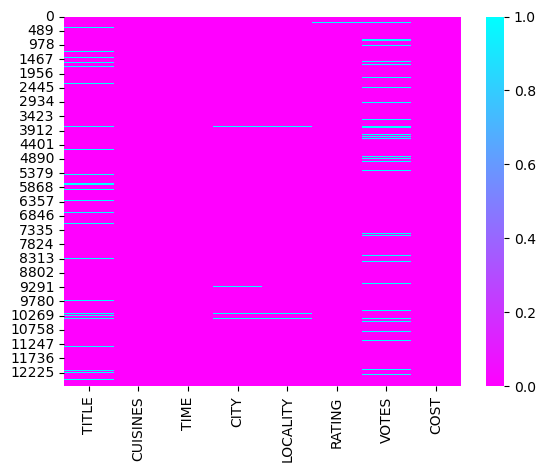

In [113]:
# Visualize the null values with heatmap
sns.heatmap(train_data.isnull(),cmap='cool_r')

In [114]:
# Check the null values on test data
test_datas.isnull().sum()

TITLE       284
CUISINES      0
TIME          0
CITY         35
LOCALITY     30
RATING        2
VOTES       402
dtype: int64

# Data Cleaning on train data

In [115]:
# Check the duplicated value
train_data.duplicated().sum()

27

In [116]:
# drop the duplicated values
train_data.drop_duplicates(inplace=True)

In [117]:
# Check the white spaces for train data
train_data.isin([' ','?','-','null','NA','nan','NEW']).sum()

TITLE          0
CUISINES       0
TIME           0
CITY           0
LOCALITY       0
RATING      1196
VOTES          0
COST           0
dtype: int64

In [118]:
# check the unique values for RATING
train_data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [119]:
# Replace specified values with np.nan
train_data['RATING'].replace([' ', '?', '-', 'null', 'NA', 'nan', 'NEW'], np.nan, inplace=True)

In [120]:
# convert the object dtype to float64
train_data["RATING"]=train_data["RATING"].astype(float)
train_data["RATING"].dtype

dtype('float64')

In [121]:
# Fill the null values with median of RATING column
train_data["RATING"]=train_data["RATING"].fillna(train_data["RATING"].median())
train_data.isnull().sum()

TITLE       1000
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING         0
VOTES       1198
COST           0
dtype: int64

In [122]:
train_data['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', nan, 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR',
 

In [123]:
# # fill the null values with mode of TITLE Column
mode_value = train_data['TITLE'].mode().iloc[0]

# Fill NaN values with the mode
train_data['TITLE'] = train_data['TITLE'].fillna(mode_value)


In [124]:
# check the city column
train_data['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [125]:
# fill the null values with mode of CITY column
mode_city = train_data['CITY'].mode().iloc[0]

train_data['CITY'] = train_data['CITY'].fillna(mode_city)

In [126]:
# Check the locality column
train_data['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [127]:
# fill the null values with mode of LOCALITY Column
mode_locality = train_data['LOCALITY'].mode().iloc[0]

# Fill NaN values with the mode
train_data['LOCALITY'] = train_data['LOCALITY'].fillna(mode_locality)

In [128]:
# check the VOTES Column
train_data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [129]:
# Extract numeric values from the 'VOTES' column
train_data['VOTES'] = train_data['VOTES'].str.extract('(\d+)')

# Convert the extracted values to integers
train_data['VOTES'] = train_data['VOTES'].astype(float)

In [130]:
# # fill the null values with median of VOTES Column
train_data['VOTES'] = train_data['VOTES'].fillna(train_data['VOTES'].median())
# train_data['VOTES'] = train_data['VOTES'].fillna(0.0)

In [131]:
# Change the data type of traget varible becoz cost may be in float
train_data['COST']=train_data['COST'].astype(float)

In [132]:
train_data.drop_duplicates(inplace=True)

In [133]:
# Check the values counts
for col in train_data.columns:
    print(train_data[col].value_counts())
    print('______________________________')

TITLE
QUICK BITES               5210
CASUAL DINING             3644
CAFÉ                       606
DESSERT PARLOR             381
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64
______________________________
CUISINES
South Indian                                531
North Indian                                524
North Indian, Chinese                       500
Fast Food                                   285
Chinese                                     167
                                           ... 
BBQ, Rolls                                    1
Italian, North Indian, Chinese, Salad         1
Andhra, Seafood, Biryani                      1
Italian, Biryani, Fast Food                   1
Finger Food, Continental, Asian, Chinese      1
Name: count, Length: 4155, dtype: int64
______

In [134]:
'''here cost is a target column and this is a continuos coulmn . So we can say that this is a regressor problem.'''

'here cost is a target column and this is a continuos coulmn . So we can say that this is a regressor problem.'

In [135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12662 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12662 non-null  object 
 1   CUISINES  12662 non-null  object 
 2   TIME      12662 non-null  object 
 3   CITY      12662 non-null  object 
 4   LOCALITY  12662 non-null  object 
 5   RATING    12662 non-null  float64
 6   VOTES     12662 non-null  float64
 7   COST      12662 non-null  float64
dtypes: float64(3), object(5)
memory usage: 890.3+ KB


In [136]:
# checking number of unique values in each column
train_data.nunique().to_frame("No. of unique vlaues")

,No. of unique vlaues
TITLE,112
CUISINES,4155
TIME,2689
CITY,359
LOCALITY,1416
RATING,30
VOTES,1847
COST,86


In [137]:
train_data.describe()

,RATING,VOTES,COST
count,12662.000000,12662.000000,12662.000000
mean,3.786645,391.740957,655.504739
std,0.401853,805.860094,627.427068
min,2.000000,4.000000,20.000000
25%,3.600000,63.000000,300.000000
50%,3.800000,163.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


# Visualization

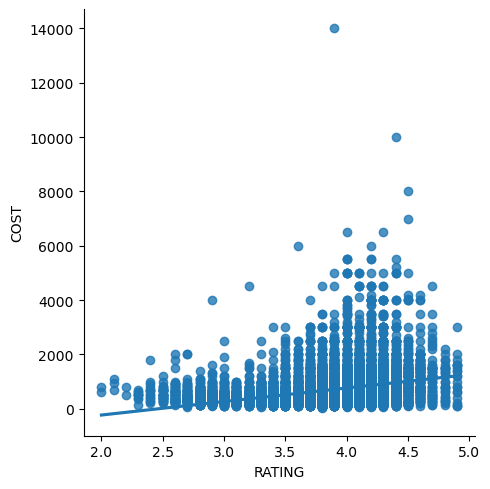

In [138]:
sns.lmplot(x='RATING',y='COST',data=train_data,palette='colorblind')

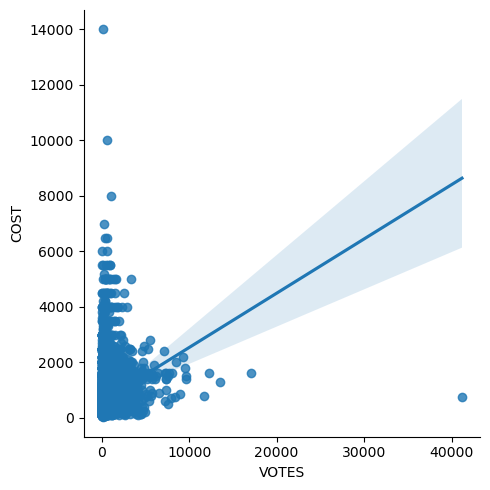

In [140]:
sns.lmplot(x='VOTES',y='COST',data=train_data,palette='colorblind')

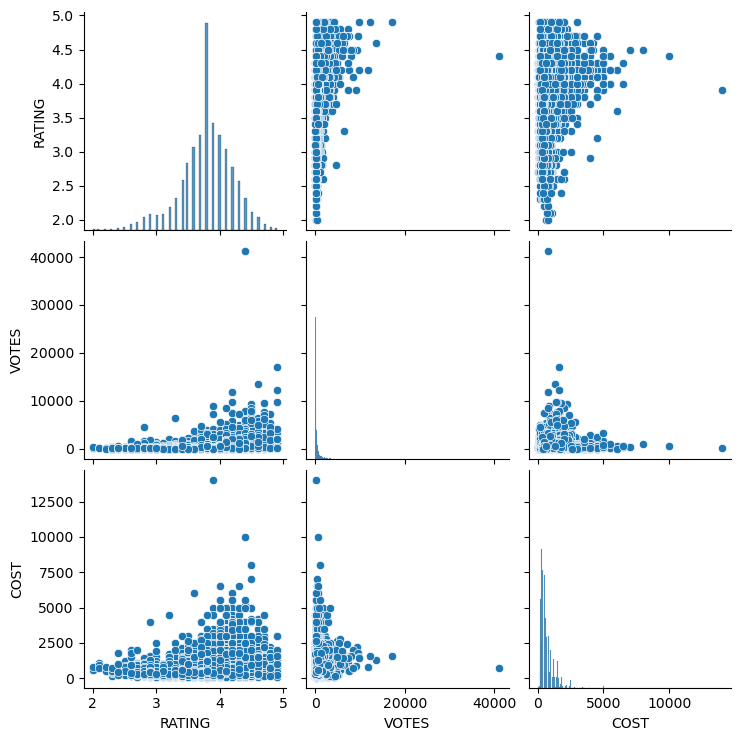

In [141]:
sns.pairplot(data=train_data,palette='Dark2')

<Axes: >

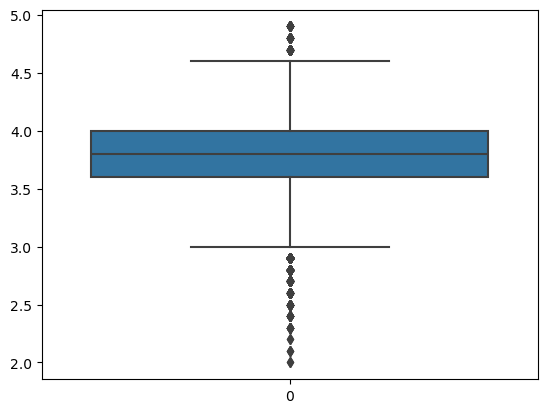

In [35]:
sns.boxplot(train_data['RATING'])

In [36]:
def replace_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    mean = np.mean(column)
    column = column.apply(lambda x: mean if x > upper or x < lower else x)
    return column

# Assuming out_df is your DataFrame and you want to apply this to specific columns
columns = ['RATING','VOTES']  # replace with your column names

for col in columns:
    train_data[col] = replace_outliers(train_data[col])

<Axes: >

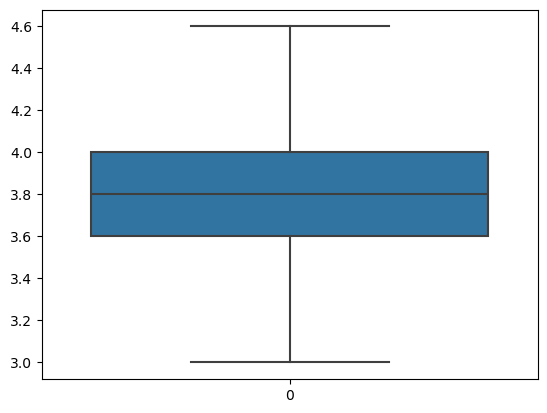

In [37]:
sns.boxplot(train_data['RATING'])

<Axes: >

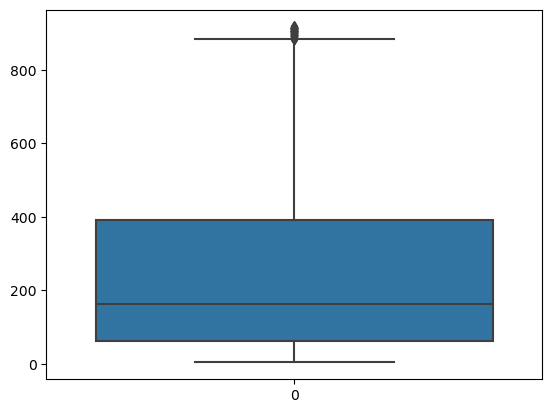

In [38]:
sns.boxplot(train_data['VOTES'])

In [39]:
# convert the object column in numerical
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in train_data.columns:
    if(train_data[col].dtypes=='object'):
        train_data[col]=le.fit_transform(train_data[col].values.reshape(-1,1))
train_data

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,3.6,49.000000,1200.0
1,33,289,1885,67,1046,4.2,30.000000,1500.0
2,31,2976,661,67,1101,3.8,221.000000,800.0
3,94,4130,275,222,136,4.1,24.000000,800.0
4,50,1766,615,222,620,3.8,165.000000,300.0
...,...,...,...,...,...,...,...,...
12685,94,2934,1144,131,342,3.8,546.000000,500.0
12686,33,2143,1177,222,133,4.3,391.740957,1800.0
12687,71,2088,1137,239,1342,4.0,608.000000,1300.0
12688,31,3506,1837,67,631,3.5,32.000000,400.0


In [40]:
# checking the skewness
train_data.skew()

TITLE      -0.079688
CUISINES   -0.218395
TIME        0.305494
CITY        0.268152
LOCALITY    0.352449
RATING     -0.090546
VOTES       1.202343
COST        3.978181
dtype: float64

In [41]:
# '''here we get some skewness in Votes column'''

In [42]:
# remove the skewness of votes column
train_data['VOTES'] = np.sqrt(train_data['VOTES'])

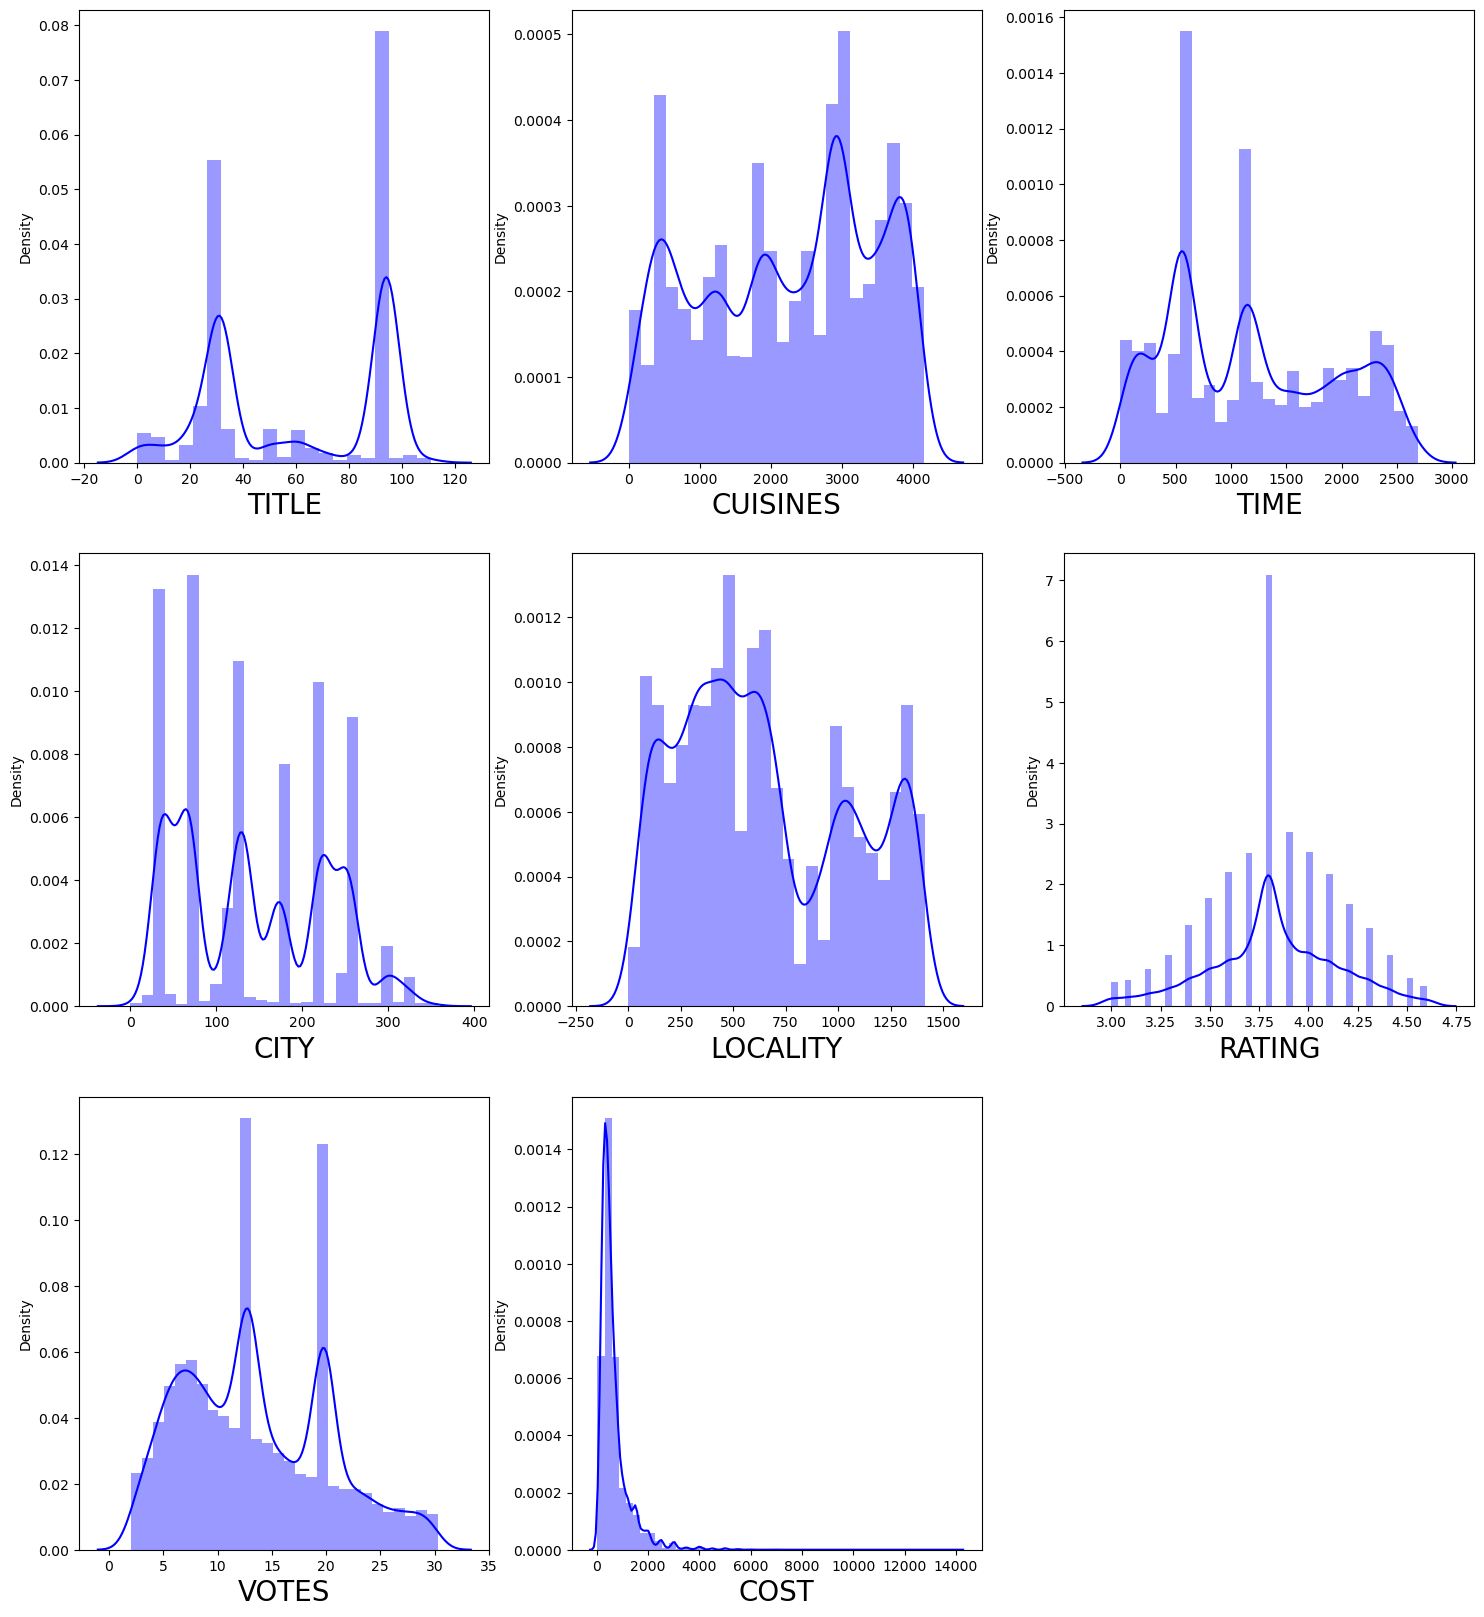

In [43]:
# checking how the data has been distributed in each column
plt.figure(figsize=(18,20),facecolor="white")
column=1
for col in train_data:
    if column<=9:
        ax=plt.subplot(3,3,column)
        sns.distplot(train_data[col],color="b")
        plt.xlabel(col,fontsize=20)
    column +=1
plt.show()

# Correlation Check

In [44]:
# check the correlation
show_rel=train_data.corr()
show_rel

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.242660,0.055882,-0.013313,0.026929,-0.162762,-0.188934,-0.264400
CUISINES,0.242660,1.000000,0.105482,0.024073,0.017482,-0.052099,-0.015812,-0.014327
TIME,0.055882,0.105482,1.000000,-0.011224,-0.008829,0.038132,-0.021799,0.018514
CITY,-0.013313,0.024073,-0.011224,1.000000,0.042993,0.045041,0.132127,0.044868
LOCALITY,0.026929,0.017482,-0.008829,0.042993,1.000000,-0.034315,-0.029194,-0.015042
RATING,-0.162762,-0.052099,0.038132,0.045041,-0.034315,1.000000,0.538638,0.342962
VOTES,-0.188934,-0.015812,-0.021799,0.132127,-0.029194,0.538638,1.000000,0.321921
COST,-0.264400,-0.014327,0.018514,0.044868,-0.015042,0.342962,0.321921,1.000000


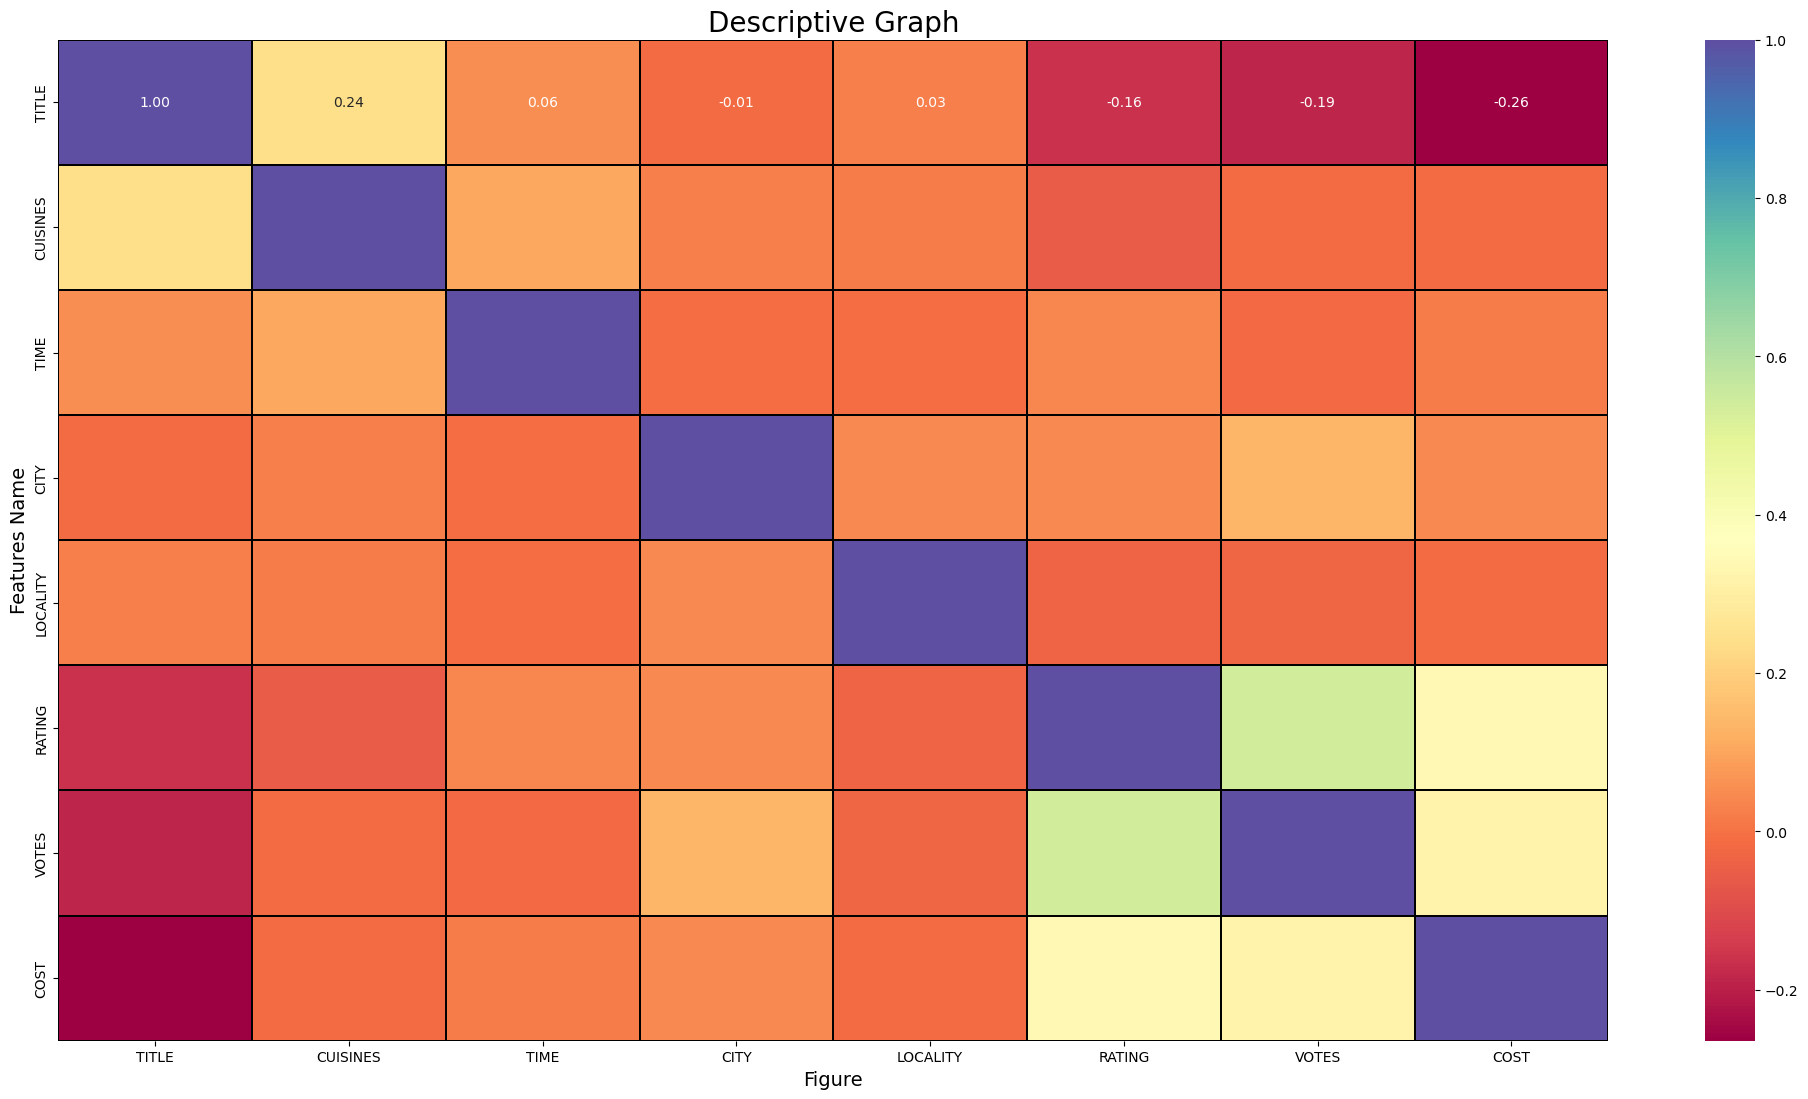

In [45]:
plt.figure(figsize=(25,13))
sns.heatmap(train_data.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap="Spectral")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

In [46]:
# train_data['COST']= np.log1p(train_data['COST'])
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# train_data['COST'] = pt.fit_transform(train_data[['COST']])

# Separate features and label

In [47]:
X=train_data.iloc[:,:-1]
Y=train_data.iloc[:,-1]
# Y = np.log(train_data['COST'] + 1)

In [48]:
X.shape

(12662, 7)

In [49]:
Y.shape

(12662,)

# Feature Scaling using StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.871503,0.325604,-0.584858,2.119375,-0.920656,-0.692878,-0.980697
1,-0.810702,-1.616208,0.934334,-0.896341,0.986362,1.177188,-1.208242
2,-0.871503,0.615464,-0.688258,-0.896341,1.124188,-0.069523,0.194717
3,1.043720,1.573912,-1.199958,0.951232,-1.294041,0.865510,-1.294649
4,-0.293896,-0.389494,-0.749238,0.951232,-0.081167,-0.069523,-0.107253
...,...,...,...,...,...,...,...
12657,1.043720,0.580581,-0.047971,-0.133472,-0.777818,-0.069523,1.464944
12658,-0.810702,-0.076379,-0.004225,0.951232,-1.301559,1.488866,0.930858
12659,0.344512,-0.122059,-0.057250,1.153869,1.728119,0.553832,1.657858
12660,-0.871503,1.055652,0.870703,-0.896341,-0.053602,-1.004556,-1.181401


# Checking Variance Inflation Factor

In [51]:
# Finding variance inflation factor in each scaled columnn i.e x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,1.108626,TITLE
1,1.075957,CUISINES
2,1.017227,TIME
3,1.021671,CITY
4,1.004126,LOCALITY
5,1.426196,RATING
6,1.459944,VOTES


In [52]:
# drop the Votes column
X.drop(columns=['VOTES'],inplace=True)

In [53]:
# finding the best Random State for Linear regression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR

In [54]:
#  finding the best Random State for RandomForest Regressor
max_cost_accuracy=0
random_state_max=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    pred_accuracy=r2_score(y_test,pred)
    if(max_cost_accuracy<pred_accuracy):
        max_cost_accuracy=pred_accuracy
        random_state_max=i

print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")

Maximum r2 score is 0.7714308249342029 on Random_state 50 


In [55]:
#  finding the best Random State for GradientBoosting Regressor
max_cost_accuracy=0
random_state_max=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    rfr=GradientBoostingRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    pred_accuracy=r2_score(y_test,pred)
    if(max_cost_accuracy<pred_accuracy):
        max_cost_accuracy=pred_accuracy
        random_state_max=i

print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")

Maximum r2 score is 0.7560748848613936 on Random_state 80 


In [56]:
# !pip install lightgbm
from math import sqrt
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 350,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction': 0.85,
         'bagging_freq': 1,
         'feature_fraction': 0.55
         }

lgbm = lgb.train(params=param,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(x_test)
print('accuracy : ',r2_score(y_test,y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 10129, number of used features: 6
[LightGBM] [Info] Start training from score 657.988153
accuracy :  0.7640638078502544


In [57]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(estimator=None, n_estimators=30, max_samples=0.9, max_features=1.0, bootstrap=True, 
                      bootstrap_features=True, oob_score=True, warm_start=False, n_jobs=1, random_state=42, verbose=1)
br.fit(x_train, y_train)
y_pred_br = br.predict(x_test)
print('Accuracy : ',r2_score(y_test,y_pred_br))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy :  0.7513528110735942


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [58]:
'''here we observe that best accuracy with RandomForestRegressor on 50 random state.'''

'here we observe that best accuracy with RandomForestRegressor on 50 random state.'

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=50)

In [60]:
# Accuracy check with RandomForest Regressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr)
print('R2_score',r2_score(y_test,pred_rfr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_rfr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_rfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
R2_score 0.7697664232113917
R2_score on training Data: 95.75425434558313
Mean Absolute Error : 180.8045911116124
Mean Squared error:  82433.47509710258
Root Mean Squared Error: 287.11230398069426


In [62]:
# Accuracy check with KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error: ",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score 0.40492245353142586
R2_score on training Data: 63.254027361274325
Mean Absolute Error : 267.26885116462694
Mean Squared error:  213063.23253059614
Root Mean Squared Error: 461.5877300477084


In [63]:
# Accuracy check with SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score 0.09058000662591925
R2_score on training Data: 8.642769547635975
Mean Absolute Error : 299.16153876240617
Mean Squared error:  325611.2832119227
Root Mean Squared Error: 570.6235915311622


In [64]:
# Accuracy check with GradientBoosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score',r2_score(y_test,pred_gbr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_gbr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_gbr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score 0.7514101239410527
R2_score on training Data: 72.08649582476659
Mean Absolute Error : 191.62563864893752
Mean Squared error:  89005.81593410308
Root Mean Squared Error: 298.33842517199


In [65]:
# Accuracy check with Lasso
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score',r2_score(y_test,pred_ls))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_ls))
print("Mean Squared error: ",mean_squared_error(y_test,pred_ls))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso()
R2_score 0.16323228534306178
R2_score on training Data: 16.68426469182862
Mean Absolute Error : 337.2941384610831
Mean Squared error:  299598.657721262
Root Mean Squared Error: 547.3560611898456


In [66]:
# Accuracy check with Ridge
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score',r2_score(y_test,pred_rg))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_rg))
print("Mean Squared error: ",mean_squared_error(y_test,pred_rg))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge()
R2_score 0.16312990401022198
R2_score on training Data: 16.68567508459845
Mean Absolute Error : 337.59353547044765
Mean Squared error:  299635.31462061085
Root Mean Squared Error: 547.3895455894375


In [67]:
# Accuracy check with DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error: ",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score 0.5300801744218948
R2_score on training Data: 99.99868167308155
Mean Absolute Error : 250.35728385313857
Mean Squared error:  168251.4113699171
Root Mean Squared Error: 410.1846064516769


# Cross Validation score check for above model

In [68]:
# Cross validation with Random Forest Regressor
score=cross_val_score(rfr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rfr)-score.mean())*100)

[0.65721572 0.73093969 0.71423242 0.72859187 0.75101198]
0.7163983334375223
Difference between R2 score and cross validation score is : 5.336808977386931


In [69]:
# Cross validation with SVR
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_svr)-score.mean())*100)

[0.07585444 0.08886928 0.10755862 0.07788625 0.09007147]
0.08804800939418675
Difference between R2 score and cross validation score is : 0.25319972317325024


In [70]:
#  Cross validation with KNN
score=cross_val_score(knn,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_knn)-score.mean())*100)

[0.35727409 0.44271085 0.37879838 0.41988621 0.47333092]
0.41440009199174943
Difference between R2 score and cross validation score is : -0.9477638460323567


In [71]:
# Cross validation with GradientBoosting Regressor
score=cross_val_score(gbr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_gbr)-score.mean())*100)

[0.63486535 0.72341972 0.69924311 0.71334202 0.73414474]
0.7010029895120307
Difference between R2 score and cross validation score is : 5.0407134429022005


In [72]:
# Cross validation with Lasso
score=cross_val_score(ls,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_ls)-score.mean())*100)

[0.14815493 0.16264129 0.18069292 0.15978837 0.18035363]
0.16632623070268956
Difference between R2 score and cross validation score is : -0.30939453596277866


In [73]:
# Cross validation with Ridge
score=cross_val_score(rg,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rg)-score.mean())*100)

[0.14806306 0.16254259 0.18056607 0.15980408 0.18037495]
0.16627015149021615
Difference between R2 score and cross validation score is : -0.3140247479994168


In [74]:
# Cross validation with Decision Tree Regressor
score=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.51713622 0.39844678 0.49924753 0.50638356 0.4650177 ]
0.477246356831838
Difference between R2 score and cross validation score is : 5.283381759005678


In [ ]:
''''''

# Hyper Parameter Tuning

In [77]:
# RandomForest Regressor
from sklearn.model_selection import GridSearchCV
parameters={
    'criterion':['squared_error','absolute_error'],
    'random_state':[10,50],
    'max_depth':[0,10],
    'n_jobs':[-1,1],
    'n_estimators':[50,100],
    'max_features':['sqrt','log2'],
    'ccp_alpha':[0.1,0.0]
}

In [78]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5,verbose=5)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=0, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=50;, score=

[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.568 total time=   2.4s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.635 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.721 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.732 total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.671 total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=50;, score=0.564 total time=   0.0s
[CV 2/5] END ccp_alpha

[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.635 total time=   0.3s
[CV 3/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.721 total time=   0.3s
[CV 4/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.732 total time=   0.3s
[CV 5/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.671 total time=   0.3s
[CV 1/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=50;, score=0.564 total time=   0.3s
[CV 2/5] END ccp_alpha=0.1, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=50;, score=0.642 total time=   0.3s
[CV 3/5] END ccp_alpha=0.1, 

[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.533 total time=   2.9s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.612 total time=   3.1s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.682 total time=   4.2s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.684 total time=   5.2s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.656 total time=   4.2s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=50;, score=0.533 total time=   4.4s
[CV 2/5] END ccp

[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.533 total time=  15.3s
[CV 2/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.612 total time=  15.5s
[CV 3/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.682 total time=  15.7s
[CV 4/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.684 total time=  15.1s
[CV 5/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.656 total time=  15.0s
[CV 1/5] END ccp_alpha=0.1, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=50;, score=0.533 total time=  14.4s
[CV 2/5] END ccp_alpha

[CV 1/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=10;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=0, max_features=log2, n_estimators=100, n_jobs=1, random_state=50;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=sq

[CV 2/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=10;, score=0.635 total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=10;, score=0.721 total time=   0.1s
[CV 4/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=10;, score=0.732 total time=   0.0s
[CV 5/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=10;, score=0.671 total time=   0.1s
[CV 1/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=50;, score=0.564 total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, criterion=squared_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=-1, random_state=50;, score=0.642 total time=   0.0s
[CV 3/5] END ccp_alpha

[CV 1/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.535 total time=   2.8s
[CV 2/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.613 total time=   3.0s
[CV 3/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.683 total time=   3.0s
[CV 4/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.685 total time=   4.3s
[CV 5/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=10;, score=0.657 total time=   4.6s
[CV 1/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=sqrt, n_estimators=50, n_jobs=-1, random_state=50;, score=0.535 total time=   4.7s
[CV 2/5] END ccp

[CV 1/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.535 total time=  14.7s
[CV 2/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.613 total time=  14.8s
[CV 3/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.683 total time=  15.0s
[CV 4/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.685 total time=  14.7s
[CV 5/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=10;, score=0.657 total time=  14.8s
[CV 1/5] END ccp_alpha=0.0, criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=50, n_jobs=1, random_state=50;, score=0.535 total time=  14.3s
[CV 2/5] END ccp_alpha

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.1, 0.0],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [0, 10], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100], 'n_jobs': [-1, 1],
                         'random_state': [10, 50]},
             verbose=5)

In [80]:
gcv.best_params_

{'ccp_alpha': 0.1,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 50}

In [82]:
final_model=RandomForestRegressor(criterion='squared_error',max_depth=10,n_estimators=100,n_jobs=-1,random_state=50,ccp_alpha=0.1,max_features='sqrt')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
R2_score=r2_score(y_test,pred)
print(R2_score*100)

72.13868457674893


# Saving the model

In [83]:
import joblib
joblib.dump(final_model,"Restaurant_Food_Cost.pkl")

['Restaurant_Food_Cost.pkl']

In [84]:
# lets load the saved model and get the predictions
model=joblib.load("Restaurant_Food_Cost.pkl")

# prediction
prediction=model.predict(x_test)
prediction

array([370.8475946 , 417.5691443 , 306.91604973, ..., 324.59347765,
       808.96907184, 784.21347188])

In [85]:
# compare with the actual test
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,370.847595,300.0
1,417.569144,100.0
2,306.916050,250.0
3,313.855298,250.0
4,1154.056339,1200.0
...,...,...
2528,753.222849,700.0
2529,366.764520,300.0
2530,324.593478,100.0
2531,808.969072,700.0


# For Test Data

In [91]:
test_datas

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [94]:
test_datas.duplicated().sum()

4

In [95]:
test_datas.drop_duplicates(inplace=True)

In [96]:
# convert the object column in numerical
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in test_datas.columns:
    if(test_datas[col].dtypes=='object'):
        test_datas[col]=le.fit_transform(test_datas[col].values.reshape(-1,1))
test_datas

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,662,23,823
1,74,1632,933,96,221,22,871
2,23,1455,219,96,411,18,575
3,85,208,1071,41,456,18,179
4,74,1637,208,78,300,16,394
...,...,...,...,...,...,...,...
4226,23,1425,103,108,597,19,487
4227,85,267,262,9,237,23,722
4228,74,679,1052,41,696,17,789
4229,74,1541,215,78,332,0,1136


In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_datas=pd.DataFrame(sc.fit_transform(test_datas),columns=test_datas.columns)
test_datas

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.864648,0.732415,-0.060237,1.285078,1.155168,0.855133,0.578121
1,0.996450,1.412599,1.202912,0.929301,-0.698924,0.692866,0.715540
2,-0.864648,1.057459,-0.894503,0.929301,0.099891,0.043801,-0.131875
3,1.397863,-1.444574,1.608294,-0.468393,0.289085,0.043801,-1.265578
4,0.996450,1.422631,-0.926816,0.471874,-0.366785,-0.280732,-0.650058
...,...,...,...,...,...,...,...
4222,-0.864648,0.997265,-1.235259,1.234253,0.881889,0.206067,-0.383809
4223,1.397863,-1.326194,-0.768188,-1.281597,-0.631655,0.855133,0.288969
4224,0.996450,-0.499540,1.552481,-0.468393,1.298114,-0.118466,0.480783
4225,0.996450,1.230013,-0.906253,0.471874,-0.232248,-2.876994,1.474205


In [98]:
# drop the Votes column
test_datas.drop(columns=['VOTES'],inplace=True)

In [99]:
test_datas

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING
0,-0.864648,0.732415,-0.060237,1.285078,1.155168,0.855133
1,0.996450,1.412599,1.202912,0.929301,-0.698924,0.692866
2,-0.864648,1.057459,-0.894503,0.929301,0.099891,0.043801
3,1.397863,-1.444574,1.608294,-0.468393,0.289085,0.043801
4,0.996450,1.422631,-0.926816,0.471874,-0.366785,-0.280732
...,...,...,...,...,...,...
4222,-0.864648,0.997265,-1.235259,1.234253,0.881889,0.206067
4223,1.397863,-1.326194,-0.768188,-1.281597,-0.631655,0.855133
4224,0.996450,-0.499540,1.552481,-0.468393,1.298114,-0.118466
4225,0.996450,1.230013,-0.906253,0.471874,-0.232248,-2.876994


In [100]:
# Predicted the value from test dataset
model=joblib.load("Restaurant_Food_Cost.pkl")

# prediction
predict_test=model.predict(test_datas)
predict_test

array([1158.7830372 ,  987.70589776,  729.93187596, ..., 1076.37167468,
        905.74711895, 1502.38989334])